In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('NFLX.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
pd.to_datetime(df['Date'],format='%Y-%m-%d')

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

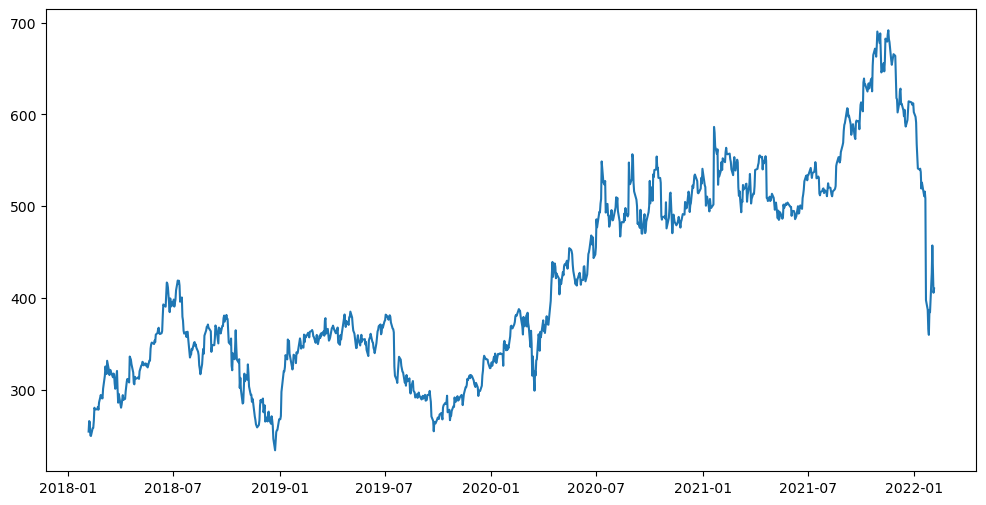

In [12]:
plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(df['Date'],format='%Y-%m-%d'),df['Close'])
plt.show()

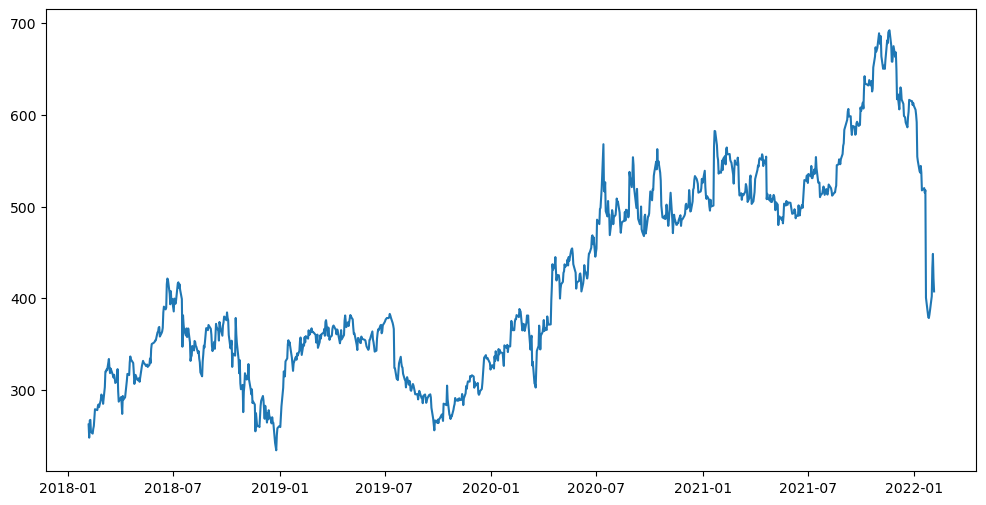

In [13]:
plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(df['Date'],format='%Y-%m-%d'),df['Open'])
plt.show()

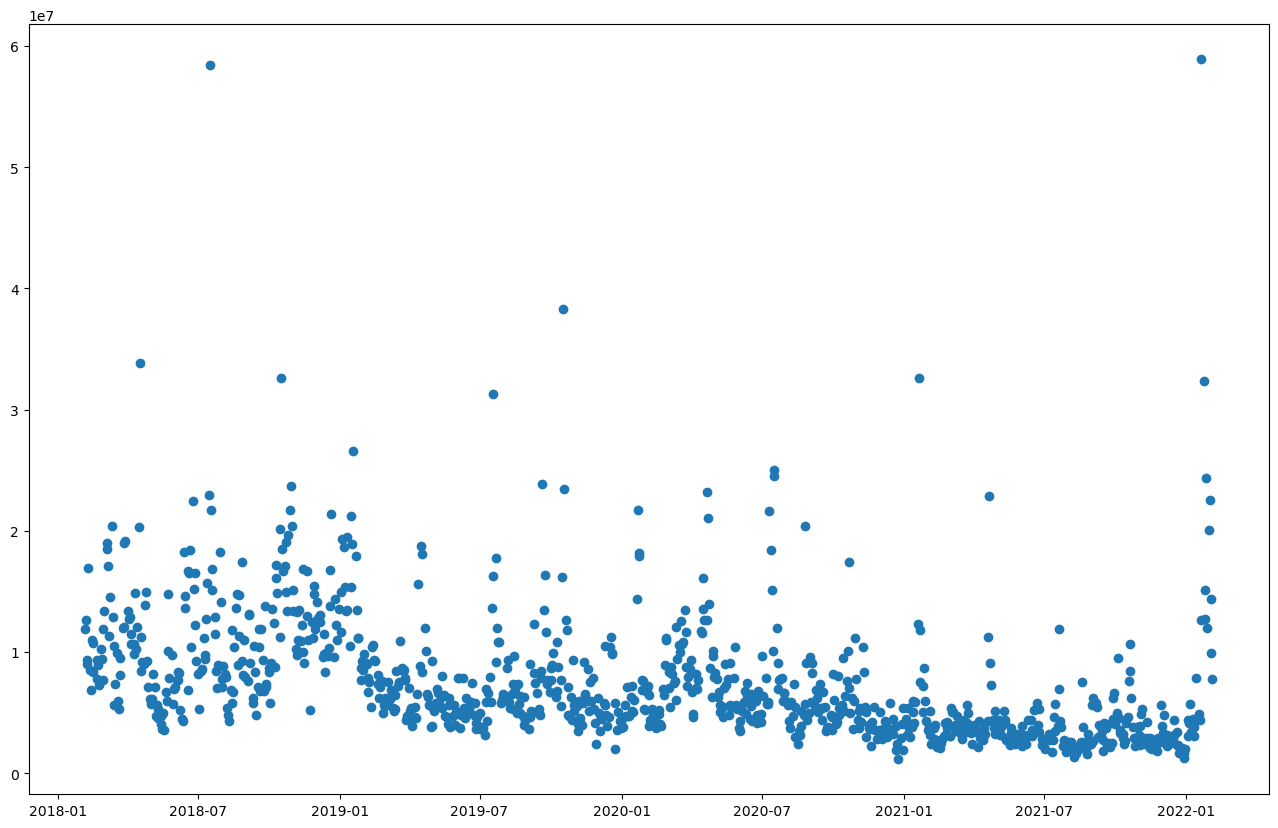

In [15]:
plt.figure(figsize=(16,10))
plt.scatter(pd.to_datetime(df['Date'],format='%Y-%m-%d'),df['Volume'])
plt.show()

In [16]:
df.max()

Date         2022-02-04
Open         692.349976
High          700.98999
Low          686.090027
Close        691.690002
Adj Close    691.690002
Volume         58904300
dtype: object

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
X = df[['Open','High','Low','Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)



In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
p = lr.predict(X_test)

In [22]:
p

array([506.96987396, 498.3065983 , 306.94846923, 376.95583623,
       300.93922808, 379.15301639, 564.47279632, 331.79901663,
       531.88676988, 585.98213063, 309.16586171, 664.94860213,
       352.65757085, 512.73324103, 499.92994868, 347.87643636,
       344.2118704 , 355.86872832, 338.65250074, 551.77461587,
       487.11205975, 552.77553791, 477.57661044, 333.88062434,
       611.071149  , 337.7811465 , 286.85268411, 517.52952535,
       353.44595506, 338.77305246, 411.63305182, 525.14612729,
       308.28526199, 415.37414971, 324.11809813, 493.30231958,
       279.86324034, 447.53238141, 503.49192883, 361.92358281,
       687.07329002, 303.05484423, 519.22766552, 391.14550933,
       534.66694454, 362.18983234, 326.42777306, 481.30238811,
       291.63350783, 316.11917058, 493.08086035, 506.91440496,
       655.13605607, 363.61065142, 312.1198414 , 342.04693155,
       485.01025846, 680.17268858, 378.47968809, 268.32861293,
       299.29035383, 502.63123041, 370.42803352, 555.07

In [24]:
from sklearn import metrics
print('MSE:' , metrics.mean_squared_error(y_test,p))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test,p)))
print('MAE:' , metrics.mean_absolute_error(y_test,p))
print('R2:' , metrics.r2_score(y_test,p))

MSE: 14.897716207594163
RMSE: 3.8597559777263335
MAE: 2.8760749789300806
R2: 0.9988123310595964


In [26]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [29]:
columns_used = ['Open','High','Low','Volume']
user_input = {}
for column in columns_used:
    user_input[column] = input(f"Enter value for {column}: ")
user_input_df = pd.DataFrame([user_input], columns=columns_used)
user_prediction = lr.predict(round(user_input_df))

# Display the predicted rent
print(f"The predicted price is: {user_prediction[0]}")

Enter value for Open:  494
Enter value for High:  496
Enter value for Low:  485
Enter value for Volume:  5900000


The predicted price is: 488.74482554836527


In [30]:

result=pd.DataFrame({'Actual':y_test,'Predicted':p,'Loss':abs(y_test-p)})
result


,Actual,Predicted,Loss
740,507.790009,506.969874,0.820135
617,502.410004,498.306598,4.103406
531,319.750000,306.948469,12.801531
522,383.790009,376.955836,6.834173
462,302.859985,300.939228,1.920757
...,...,...,...
514,380.070007,380.889560,0.819553
637,482.350006,481.685677,0.664329
352,374.600006,374.867512,0.267506
616,492.989990,495.799801,2.809811


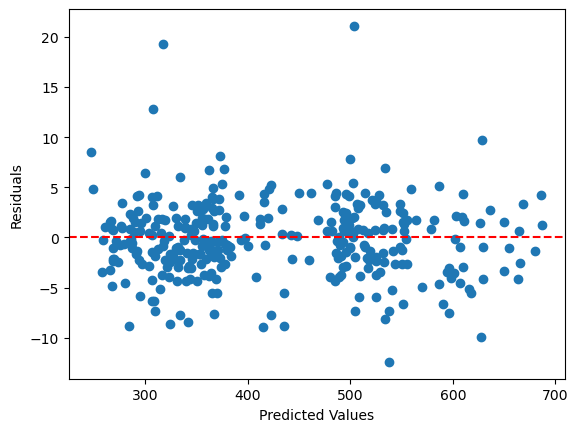

In [32]:
residuals = y_test - p
plt.scatter(p, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

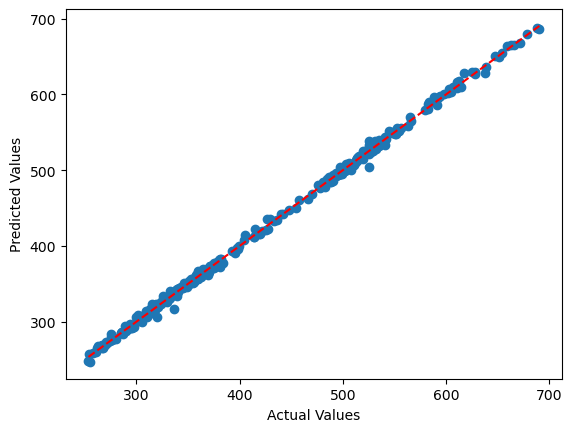

In [33]:
plt.scatter(y_test, p)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')
plt.show()


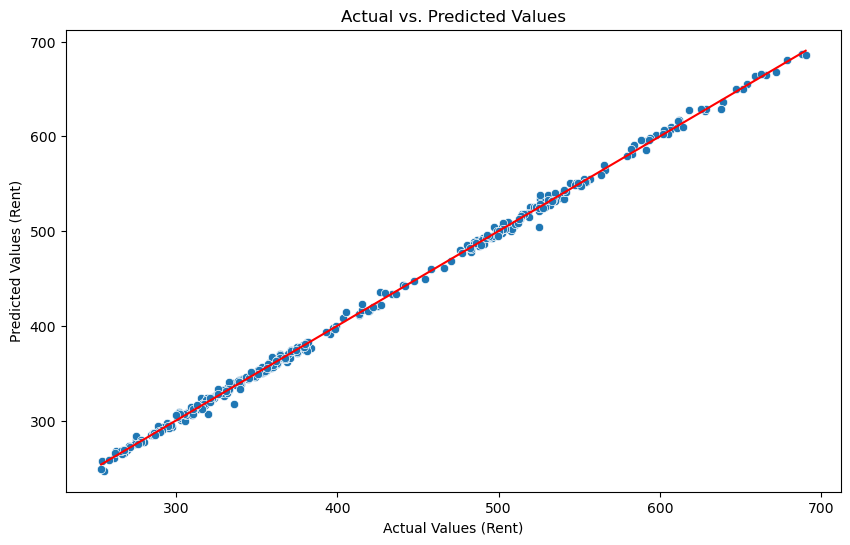

In [34]:
actual_values = y_test
predicted_values = p  

plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_values, y=predicted_values)
plt.xlabel("Actual Values (Rent)")
plt.ylabel("Predicted Values (Rent)")
plt.title("Actual vs. Predicted Values")

plt.plot([min(actual_values), max(actual_values)], 
         [min(actual_values), max(actual_values)], color='red')
plt.show()


In [35]:
import joblib

In [37]:
joblib.dump(lr,'lr11.pkl')

['lr11.pkl']